<a href="https://colab.research.google.com/github/Roarhun/wildfire-smoke-detection/blob/main/wildFireSmoke_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About this project!

This project is about detection the topic that i choose i 'Wildfire smoke'<br>
i get dataset(images) from https://public.roboflow.com/object-detection/wildfire-smoke


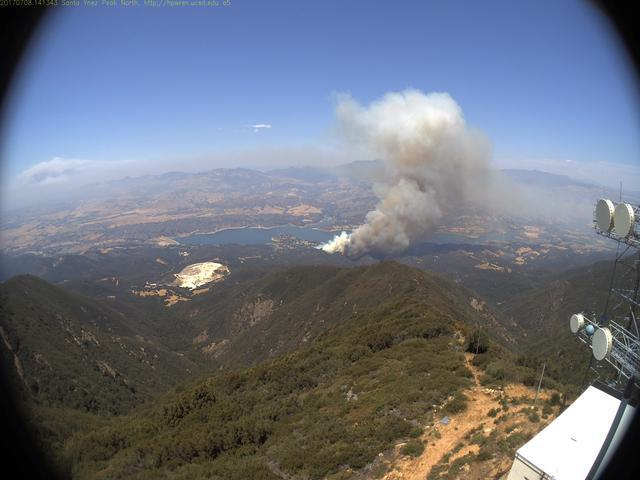

in this project ill try (YOLO11, YOLOv8, YOLOv5)

In [1]:
!nvidia-smi

Wed May  7 15:13:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#Gather and Label Training Images

1.upload


2.unzip

In [2]:
!unzip -q /content/trained_wildfire_smoke.zip  -d /content/custom_data

#Split to train and validation folders

train : รูปจริง ใช้สำหรับtrain <br>
validation : ใช้ในการทดสอบ performance ของโมเดล

In [5]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

--2025-05-07 15:31:48--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-05-07 15:31:49 (45.9 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]



In [6]:
!python train_val_split.py --datapath="/content/custom_data/trained_wildfire_smoke" --train_pct=0.9

Number of image files: 74
Number of annotation files: 74
Images moving to train: 66
Images moving to validation: 8


#Install Requirements

In [7]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

#Training Configuration

In [8]:
import yaml
import os

In [9]:
classes_txt_path = "/content/custom_data/trained_wildfire_smoke/classes.txt"

with open(classes_txt_path , 'r') as f:
  classes = []
  for line in f.readlines():
    if len(line.strip()) == 0: continue
    classes.append(line.strip())
number_of_classes = len(classes)


In [10]:
classes

['no_smoke', 'smoke']

In [13]:
def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path':'/content/custom_data/trained_wildfire_smoke',
      'train' : '/content/data/train/images',
      'val' : '/content/data/val/images',
      'names' : classes,
      'nc' : number_of_classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')
  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/trained_wildfire_smoke/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/custom_data/trained_wildfire_smoke
train: /content/data/train/images
val: /content/data/validation/images
names:
- no_smoke
- smoke
nc: 2


#Train Model

In [14]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

#Test Model

In [16]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/val/images save=True

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/8 /content/data/val/images/0e1a92a5-ck0khu2xz94nj070165dkfirk_jpeg.rf.d511cbdb4c1162cf08d710561abef2b3.jpg: 480x640 1 no_smoke, 1 smoke, 49.6ms
image 2/8 /content/data/val/images/406dc166-ck0uivtpc841h0a46ydgo7566_jpeg.rf.00134176dc2985f6029cddca1bb82930.jpg: 480x640 (no detections), 12.5ms
image 3/8 /content/data/val/images/44faf610-ck0nfsgb3a5cl0721k678jfzb_jpeg.rf.0f824c313fff7794aa4e6ff5f1c2a877.jpg: 480x640 2 no_smokes, 1 smoke, 12.4ms
image 4/8 /content/data/val/images/60b748e8-ck0ujkl8y85nx0a4678ht59jh_jpeg.rf.b637ddfa23b935bf48c28df4f7d93665.jpg: 480x640 1 smoke, 12.4ms
image 5/8 /content/data/val/images/b0df658f-ck0l9uumy9b4i0863izsuks74_jpeg.rf.688da3ca009efc20f792d1aa922f3131.jpg: 480x640 (no detections), 12.4ms
image 6/8 /content/data/val/images/c111393a-ck0tyhipjwo1707211p8ov4bm_jpeg.rf.1914b7a9869e5

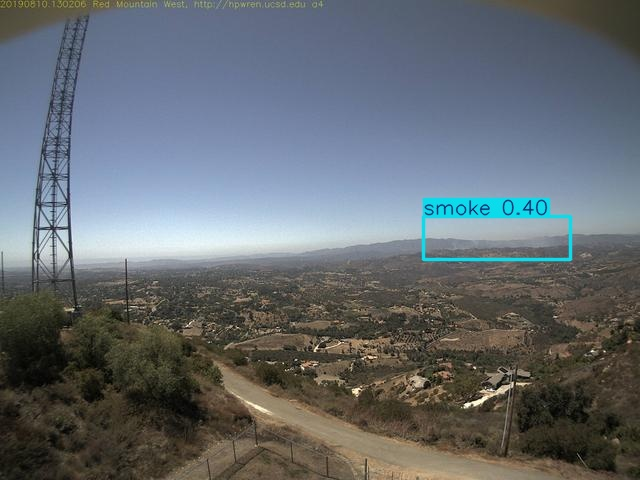

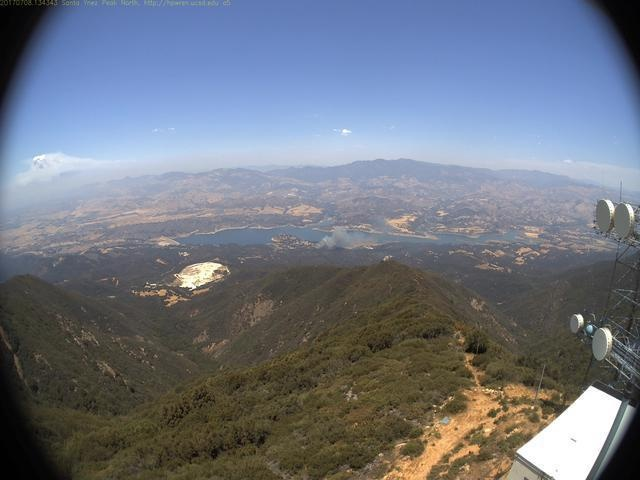

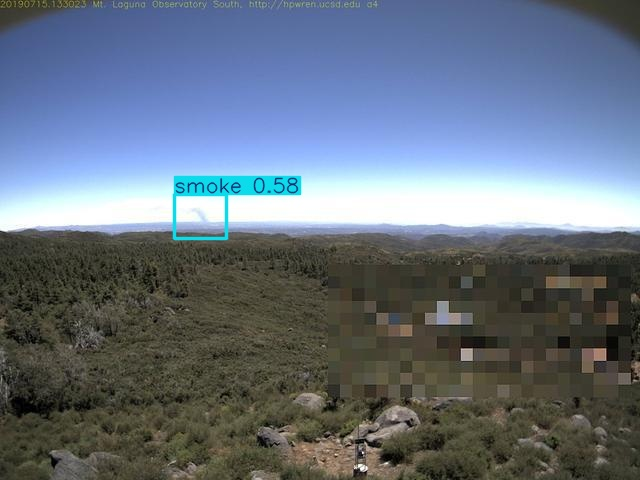

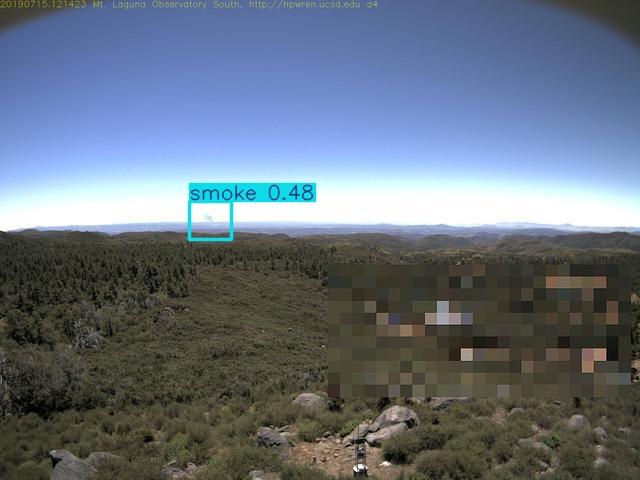

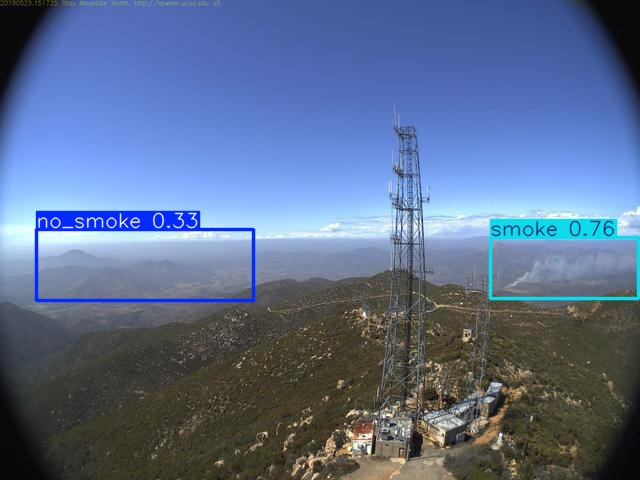

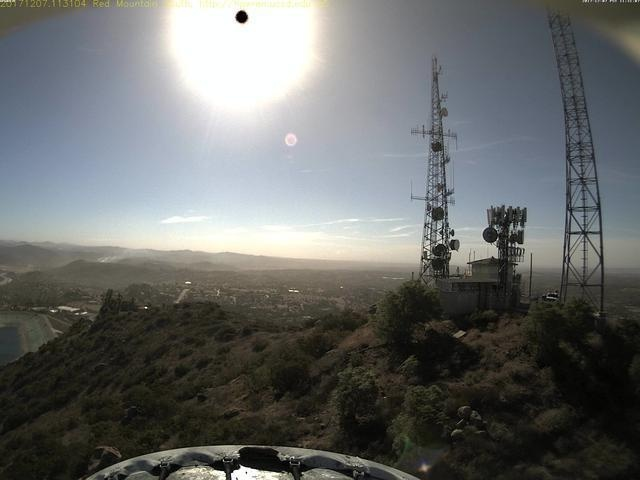

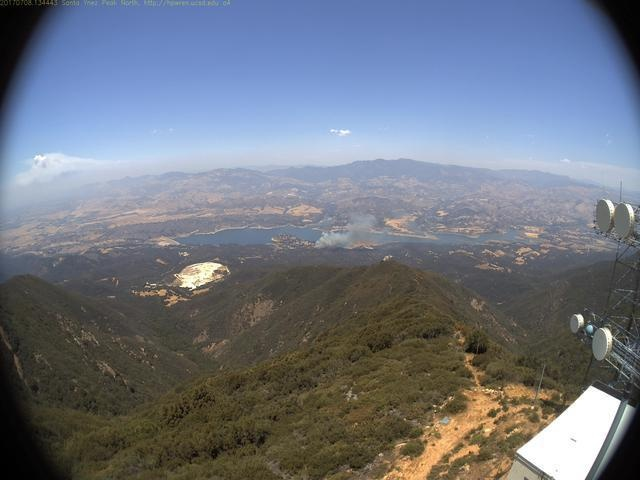

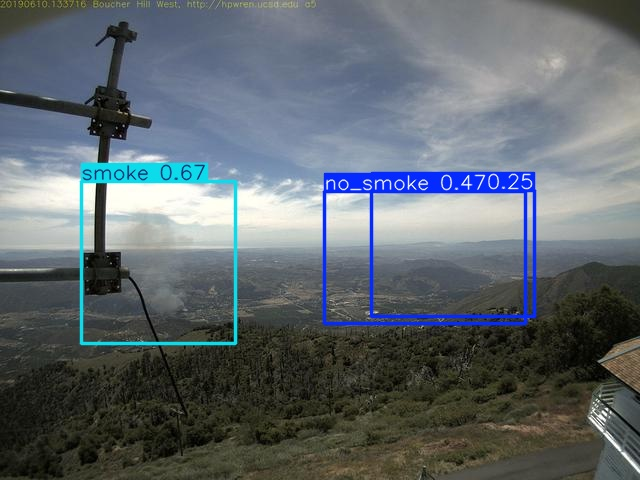

In [17]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


#Deploy Model

export model

In [18]:
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/args.yaml (deflated 53%)
  adding: train/results.csv (deflated 61%)
  adding: train/confusion_matrix.png (deflated 39%)
  adding: train/confusion_matrix_normalized.png (deflated 34%)
  adding: train/train_batch1.jpg (deflated 5%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/P_curve.png (deflated 14%)
  adding: train/val_batch0_labels.jpg (deflated 10%)
  adding: train/F1_curve.png (deflated 12%)
  adding: train/R_curve.png (deflated 16%)
  adding: train/labels.jpg (deflated 37%)
  adding: train/results.png (deflated 6%)
  adding: train/PR_curve.png (deflated 22%)
  adding: train/train_batch250.jpg (deflated 11%)
  adding: train/train_batch252.jpg (deflated 9%)
  adding: train/val_batch0_pred.jpg (deflated 10%)
  adding: train/train_batch251.jpg (deflated 12%)
  adding: train/labels_correlog

In [19]:
from google.colab import files
files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
#test on my own device
#extract my_model.zip